# Read the dataset and understand the features and target variable

In [1]:
import pandas as pd

In [2]:
colnames=['Industrial Risk',
'Management Risk',
'Financial Flexibility',
'Credibility',
'Competitiveness',
'Operating Risk',
'Class']

df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names=colnames)

In [3]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
df.shape

(250, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
df.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1080x1152 with 0 Axes>

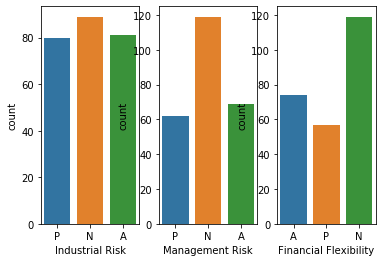

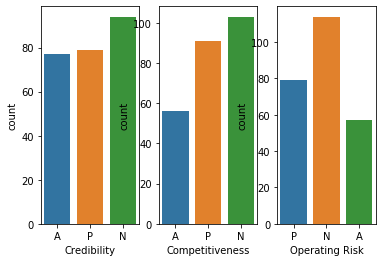

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,3)
sns.countplot(df['Industrial Risk'], ax=ax[0])
sns.countplot(df['Management Risk'], ax=ax[1])
sns.countplot(df["Financial Flexibility"], ax=ax[2])
fig.show()

fig, ax =plt.subplots(1,3)
sns.countplot(df["Credibility"], ax=ax[0])
sns.countplot(df["Competitiveness"], ax=ax[1])
sns.countplot(df["Operating Risk"], ax=ax[2])
fig.show()

# EDA Summary

1. There are 250 records 6 are independent and 1 is dependent/target , so total 7 features
2. All columns have categorical data and are ordinal columns.
3. There are no missing values, same is also given in the problem statement. Also revalidated using isNAN , isSum
4. Each of the 6 independent features have one of the 3 possible values
    P=Positive,A-Average,N-negative
5. Data distribution across the categories
   - Competitiveness has the highest 'P' positive count of 91 of ALL the features while Financial Flexibility has the lowest with 57
   - Management Risk and Financial Flexibility have the highest 'N' negative count of 119 while Industrial Risk is the least with 89 entries.
   - Industrial Risk has the highest 'A' average count of 81 while Competitiveness has the least with 56 entries.

From this data we can infer that Financial flexibility is the biggest negative driver while competitivenss is the most positive driving factor.

# Encode Categorical Data

One hot encoder only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded.
Encode the categorical data using Label and Onehot Encoding

In [29]:
# label encoding the independent data 
df_ind = df.loc[:,'Industrial Risk':'Operating Risk']
df_ind.head()
df_ind.shape

(250, 6)

In [30]:
ind_features=['Industrial Risk',
'Management Risk',
'Financial Flexibility',
'Credibility',
'Competitiveness',
'Operating Risk']

df_label_enc = df_ind.copy()

In [34]:
df_label_enc.shape

(250, 6)

In [35]:
df_label_enc.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [36]:
#df_enc = pd.get_dummies(df_enc, columns=ind_features)
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder()
df_label_enc[ind_features] = df_label_enc[ind_features].apply(lambda col: le.fit_transform(col))

In [38]:
df_label_enc.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [39]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
df_encoded = onehotencoder.fit_transform(df_label_enc)

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [40]:
df_encoded.shape

(250, 18)

In [43]:
df_enc = pd.DataFrame(df_encoded.todense())

In [45]:
df_enc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [46]:
df_enc.shape

(250, 18)

# Separate the dependant variable from the rest of the train data

In [55]:
X=df_enc
y=df['Class']

# Split the dataset into training and test data ( Take 80:20 ratio)

In [58]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=test_size, random_state=seed)

# Apply PCA on the independent features of train data

In [63]:
# We transform (centralize) the entire X (independent variable data) using MinMaxScalar. We will create the PCA dimensions
# on the training data. 

from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
data_rescaled_train = scaler.fit_transform(X_train)

In [64]:
#Fitting the PCA algorithm with our Data
#Plotting the Cumulative Summation of the Explained Variance

#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled_train)
reduced = pca.transform(data_rescaled_train)

# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

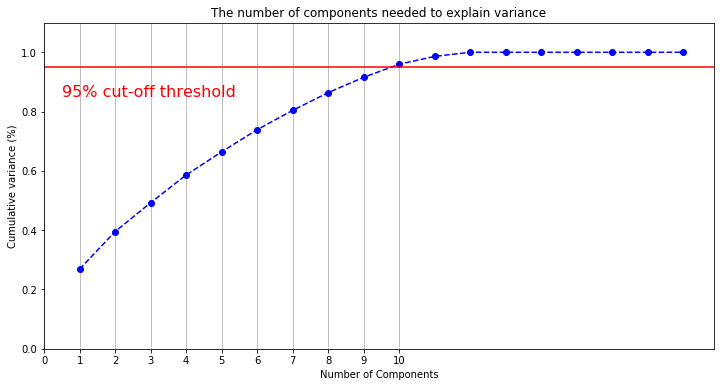

In [65]:
pca = PCA().fit(data_rescaled_train)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Transform the data using PCA ( select optimum number of PCs)

In [75]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(data_rescaled_train)
print(X_pca)

[[ 0.88455426  0.42682269 -0.82888148 ...  0.08950446  0.1009336
   0.57578286]
 [-0.22047877  1.30024195 -0.36107707 ...  0.25972651  0.37228855
  -0.41080245]
 [-1.06800823  0.11359215  1.00708746 ... -0.29673553  0.45177762
  -0.15137173]
 ...
 [-0.80620164  0.43496137 -0.554148   ...  0.32191683 -0.02882972
  -0.55152221]
 [ 0.36287931 -0.25121468  0.88334373 ... -0.37536724 -0.45501366
   0.03105827]
 [ 1.20853135 -0.12367616  0.63728489 ...  0.43083308  0.94417194
   0.08383115]]


In [76]:
pca.explained_variance_ratio_

array([0.26869348, 0.12660059, 0.09735974, 0.0935395 , 0.07823224,
       0.07466707, 0.06523222, 0.05972307, 0.05169791, 0.04404927])

In [77]:
pca.explained_variance_ratio_.sum()

0.9597950762441781

n_components = 10 gives explained variance of 95.9%

In [78]:
cov_matrix_train = np.cov(data_rescaled_train.T)
print('Covariance Matrix \n%s', cov_matrix_train)

Covariance Matrix 
%s [[ 0.22221106 -0.12768844 -0.09452261  0.05442211 -0.06532663  0.01090452
   0.00256281  0.01175879 -0.01432161 -0.01577889 -0.01713568  0.03291457
   0.01246231 -0.01864322  0.0061809   0.0459799  -0.04201005 -0.00396985]
 [-0.12768844  0.23796482 -0.11027638 -0.05962312  0.09296482 -0.03334171
  -0.01711055  0.02879397 -0.01168342  0.00839196  0.01183417 -0.02022613
  -0.02984925  0.06786432 -0.03801508 -0.01670854  0.0481407  -0.03143216]
 [-0.09452261 -0.11027638  0.20479899  0.00520101 -0.02763819  0.02243719
   0.01454774 -0.04055276  0.02600503  0.00738693  0.00530151 -0.01268844
   0.01738693 -0.04922111  0.03183417 -0.02927136 -0.00613065  0.03540201]
 [ 0.05442211 -0.05962312  0.00520101  0.18590452 -0.12311558 -0.06278894
   0.01012563 -0.02005025  0.00992462 -0.02115578  0.00570352  0.01545226
  -0.01396985 -0.01665829  0.03062814  0.025      -0.02281407 -0.00218593]
 [-0.06532663  0.09296482 -0.02763819 -0.12311558  0.25125628 -0.1281407
  -0.04271357

In [79]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_train)

In [80]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.0395602186385235, array([-0.07241364,  0.17397281, -0.10155917, -0.07490527,  0.24900239,
       -0.17409712, -0.23105335,  0.41853263, -0.18747928, -0.11479709,
        0.38527666, -0.27047957, -0.15575888,  0.44749917, -0.29174029,
        0.0048563 ,  0.1526673 , -0.1575236 ])), (0.489810673082692, array([-0.4751856 ,  0.44889155,  0.02629405, -0.33273655,  0.31436189,
        0.01837466,  0.07007483, -0.21303066,  0.14295583,  0.25737263,
       -0.1880548 , -0.06931783, -0.02952295, -0.0778097 ,  0.10733265,
       -0.21379032,  0.32823669, -0.11444638])), (0.37667945867529673, array([-0.01185352, -0.27398802,  0.28584155,  0.2019475 , -0.41771107,
        0.21576357, -0.05798943, -0.01386569,  0.07185512,  0.09851063,
        0.12840236, -0.22691299, -0.22964779,  0.07504012,  0.15460767,
       -0.29344387,  0.52317219, -0.22972832])), (0.3618991473068622, array([ 0.27316382,  0.14044061, -0.41360442,  0.20745266,  0.0561679 ,
       -0.26362056, -0.02782179, -0.07553088,  0

In [81]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
# an array of variance explained by each eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)
# an array of cumulative variance. There will be 18 entries with 18th entry cumulative reaching almost 100%

In [95]:
# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:10])   # Reducing from 18 to 10 dimension space
X_std_10D = np.dot(data_rescaled_train,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_train_df = pd.DataFrame(X_std_10D)  # converting array to dataframe for pairplot

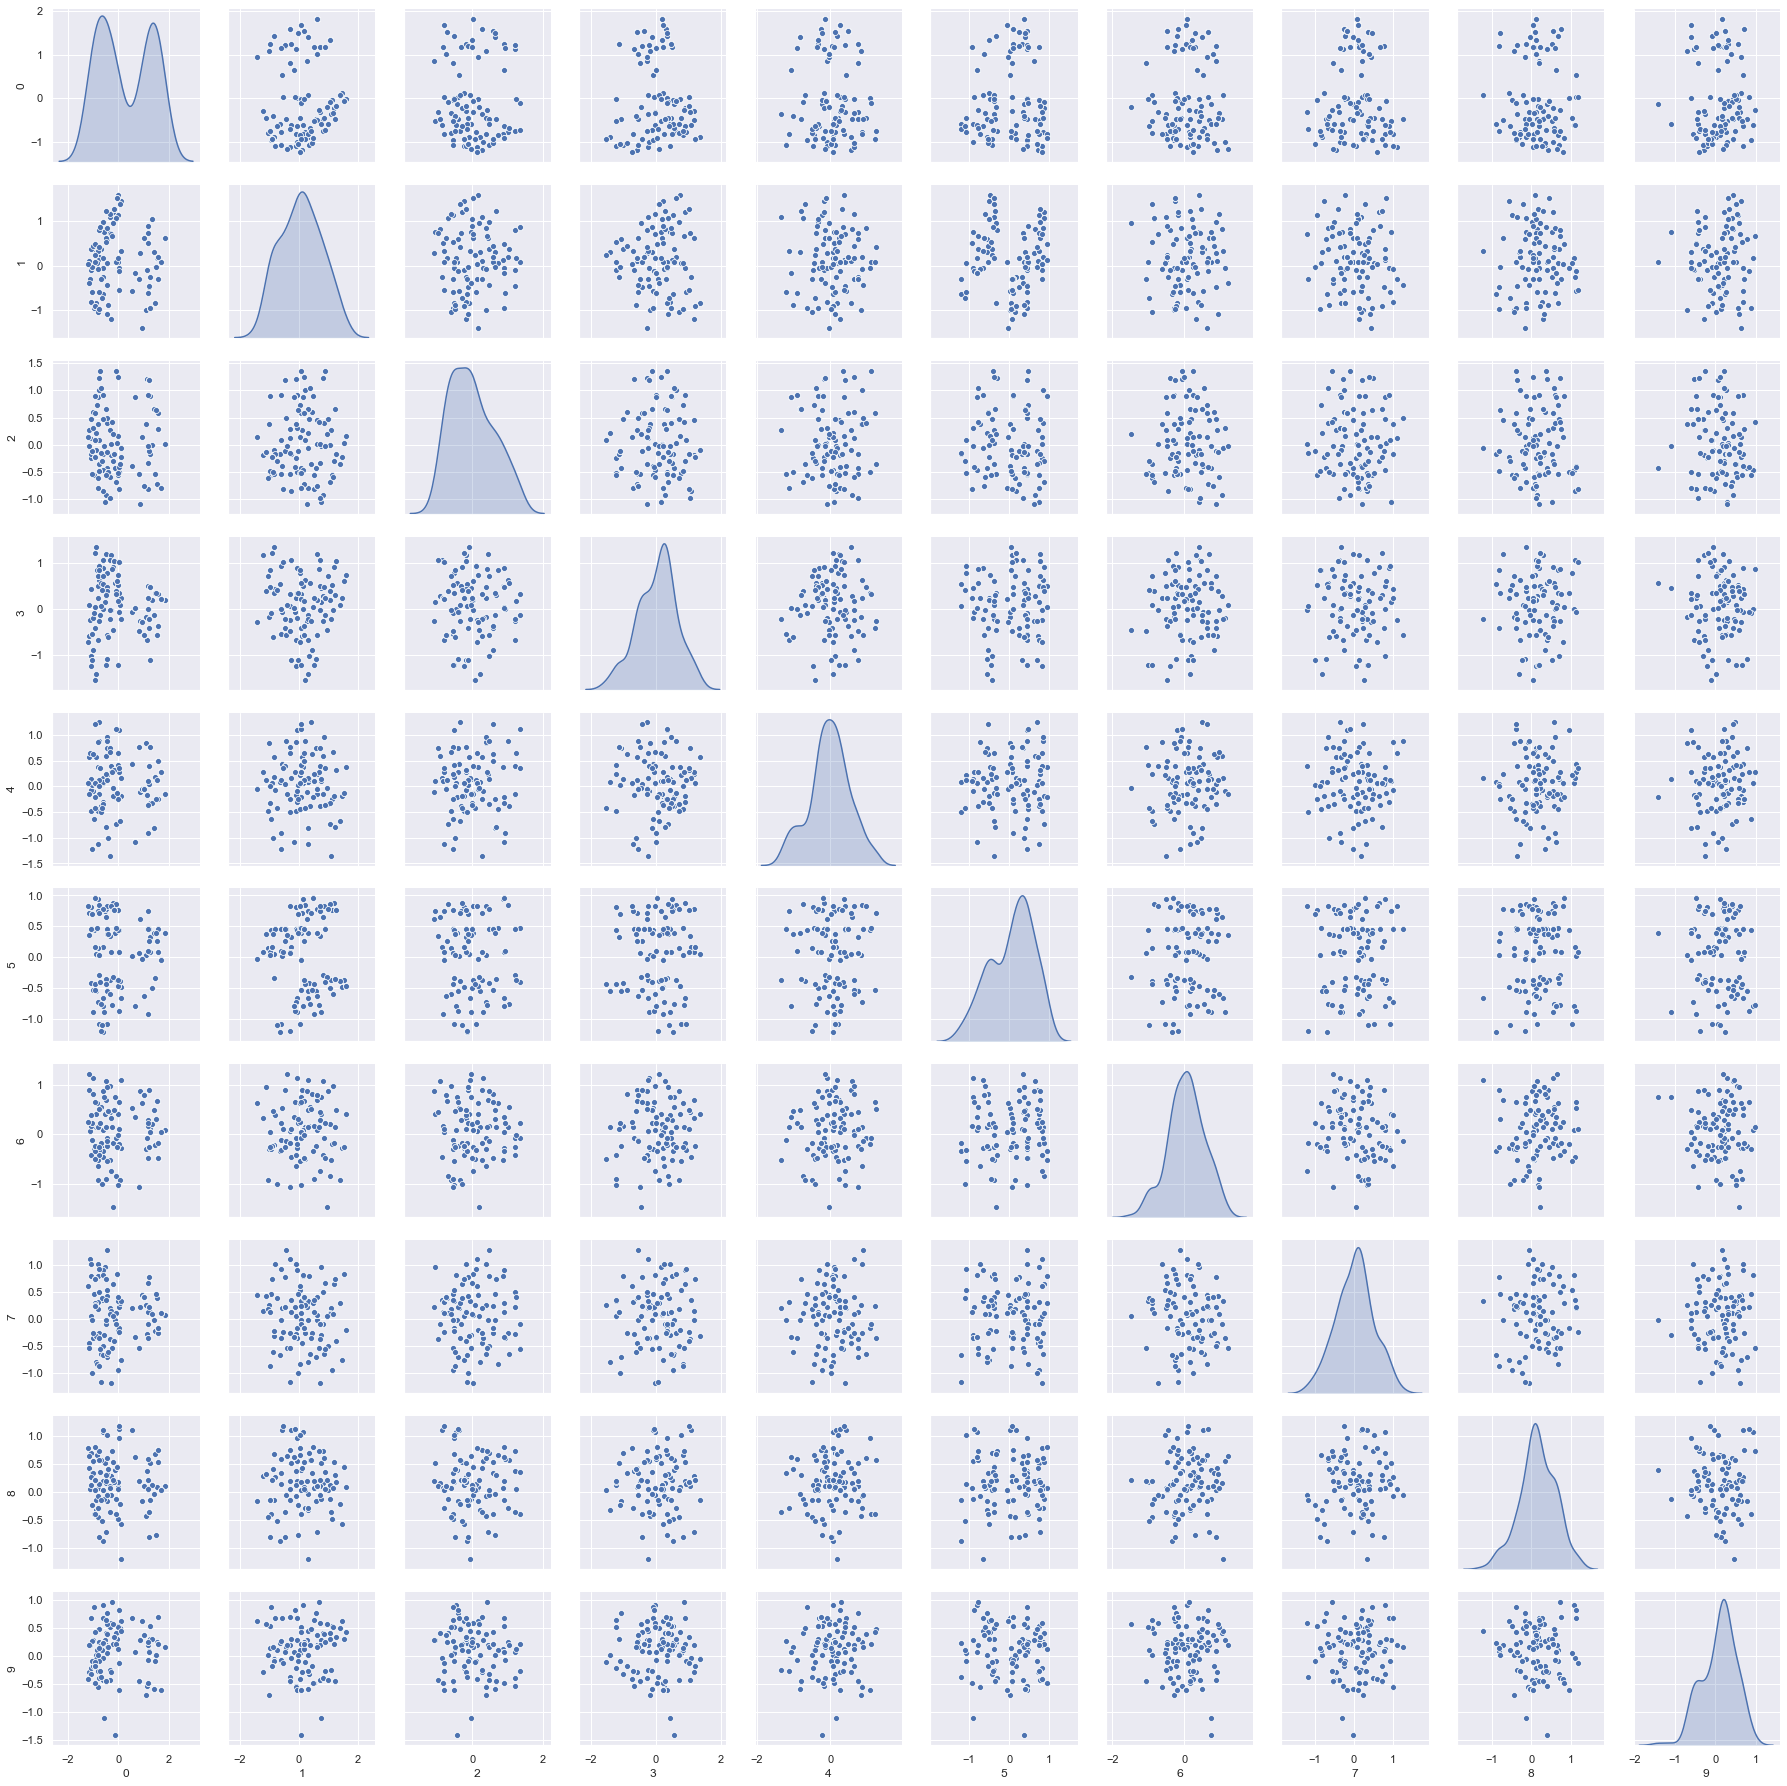

In [83]:
sns.pairplot(Proj_data_train_df, diag_kind='kde') 

# Apply KMeans algorithm on the above transformed data

In [96]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 2 to 6 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Proj_data_train_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,738.965425
1,2,553.237344
2,3,496.872498
3,4,454.836964
4,5,424.437182
5,6,402.503902
6,7,361.837363
7,8,350.655562
8,9,329.579458


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

# Select optimal number of clusters and form clusters out of the train data

Text(0.5, 1.0, 'Elbow plot')

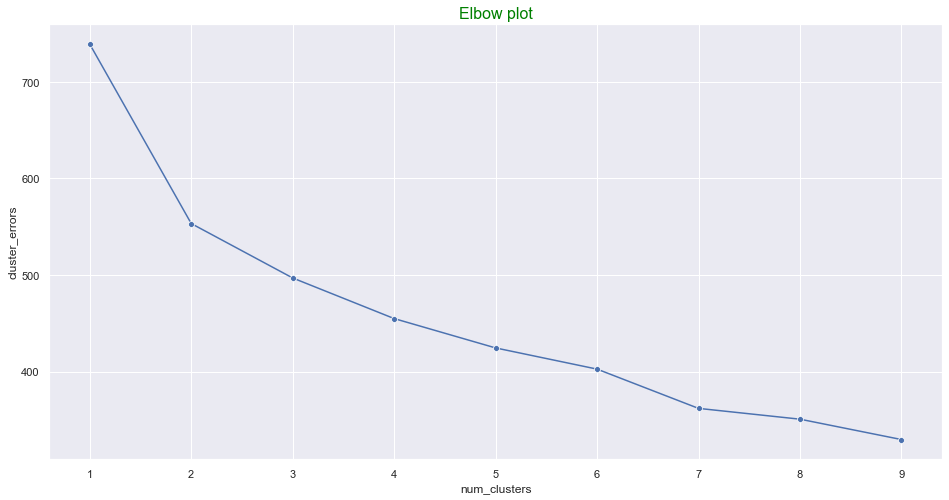

In [97]:
# Elbow plot

plt.figure(figsize=(16,8))
sns.lineplot(x='num_clusters',y='cluster_errors',data=clusters_df,marker='o')
plt.title('Elbow plot',fontsize=16,color='green')

There an elbow that be seen at number of cluster = 2

# Create a new column in the train data and populate it with the cluster labels

In [108]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(Proj_data_train_df)
# Getting the cluster labels
labels = kmeans.predict(Proj_data_train_df)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.57744204  0.18136724 -0.02516148  0.10922747  0.00564076  0.08582806
   0.03669825  0.02235156  0.15121733  0.12038671]
 [ 1.33894034 -0.02125812  0.03766281 -0.03274212 -0.02839067  0.06095657
   0.08529462  0.04918426  0.17005656  0.07565067]]


In [109]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(Proj_data_train_df) )
centroid_df

,0,1,2,3,4,5,6,7,8,9
0,-0.577442,0.181367,-0.025161,0.109227,0.005641,0.085828,0.036698,0.022352,0.151217,0.120387
1,1.338940,-0.021258,0.037663,-0.032742,-0.028391,0.060957,0.085295,0.049184,0.170057,0.075651


In [112]:
labels

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1], dtype=int32)

In [114]:
Proj_data_train_df.shape

(200, 10)

In [115]:
Proj_data_train_df['Labels']=labels
Proj_data_train_df.head()

,0,1,2,3,4,5,6,7,8,9,Labels
0,1.179066,0.515995,-0.825458,0.228386,0.107714,-0.924151,0.170523,0.124065,0.058856,-0.475751,1
1,0.074033,1.389415,-0.357653,0.091583,-0.680458,-0.380490,-0.911318,0.294287,-0.212499,0.510834,0
2,-0.773496,0.202765,1.010511,0.634364,0.878463,0.837898,0.137964,-0.262175,-0.291988,0.251404,0
3,-0.217631,1.199580,-0.298822,0.905950,-0.182985,0.880682,-0.165379,0.647727,0.535011,0.214115,0
4,1.580565,-0.311482,0.283184,0.321127,-0.243510,0.086428,-0.165028,-0.262345,0.744791,0.695035,1


In [116]:
Proj_data_train_df.Labels.unique()

array([1, 0])

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


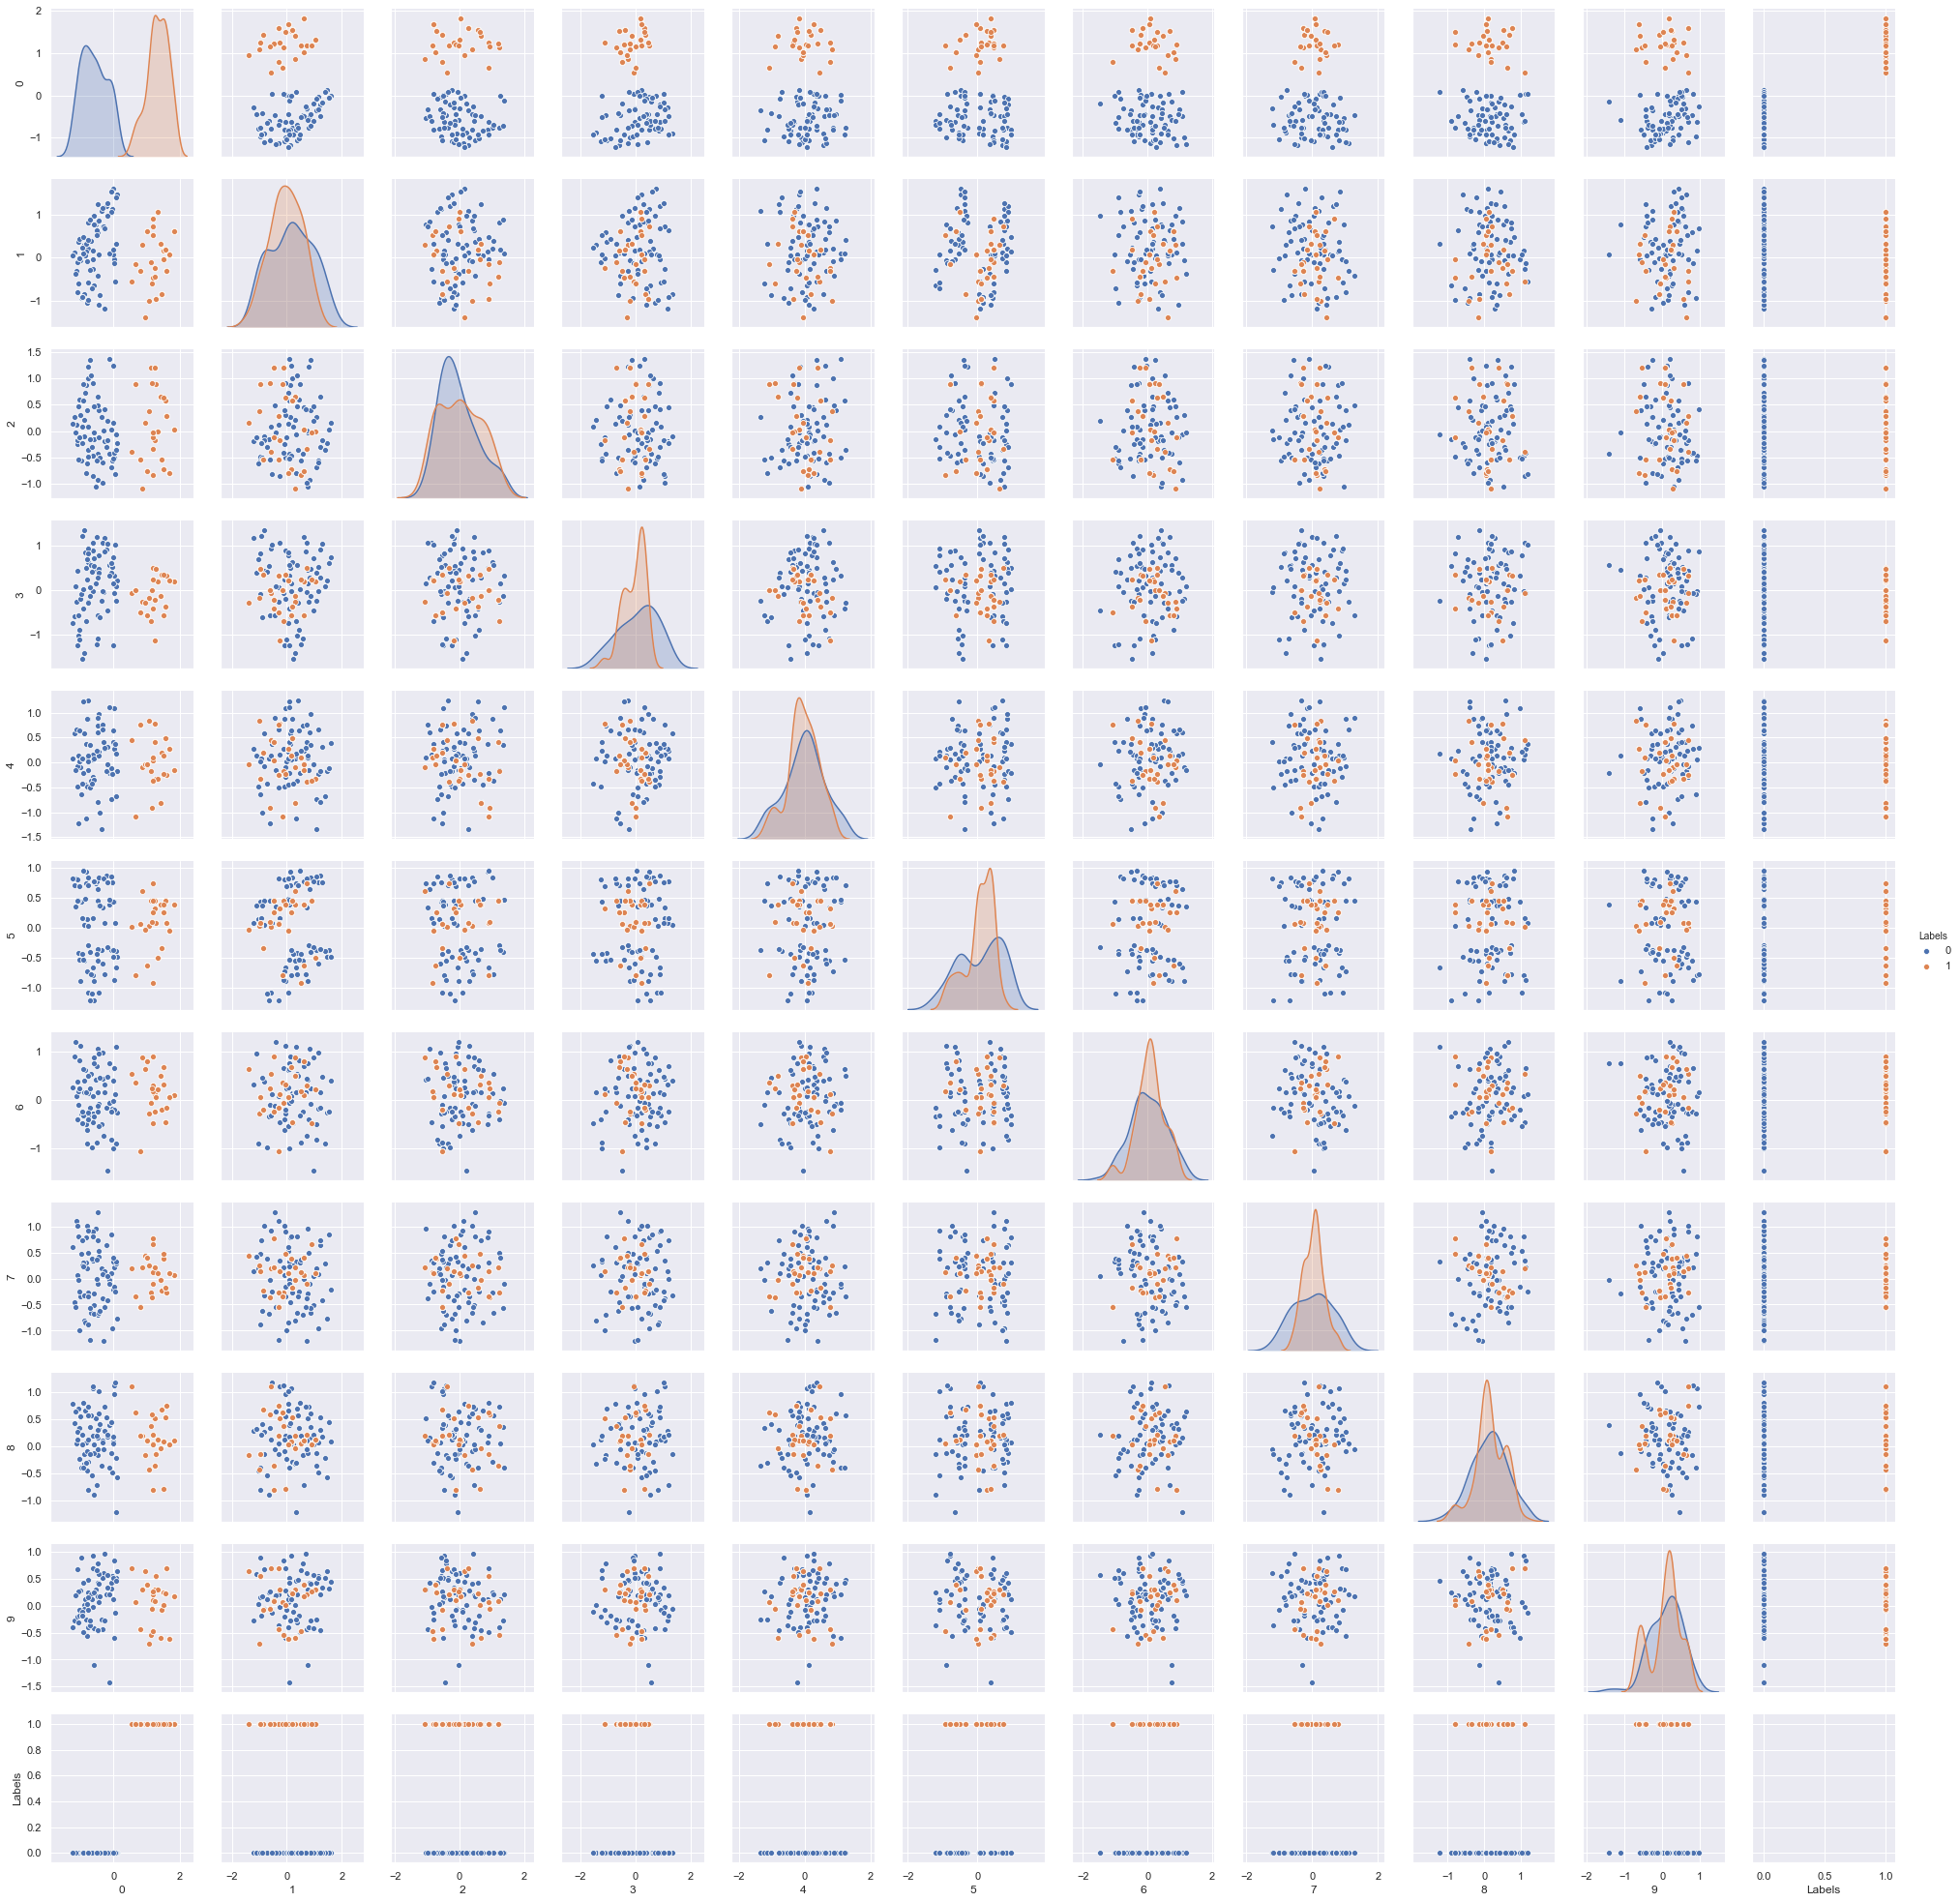

In [117]:
sns.pairplot(data=Proj_data_train_df,diag_kind='kde',hue='Labels')

# Transform the test data using the same PCA object that was fit on the train data

In [118]:
data_rescaled_test = scaler.transform(X_test)

In [119]:
reduced_test = pca.transform(data_rescaled_test)

In [120]:
cov_matrix_test = np.cov(data_rescaled_test.T)
print('Covariance Matrix \n%s', cov_matrix_test)

Covariance Matrix 
%s [[ 0.21428571 -0.07346939 -0.14081633  0.08163265 -0.0755102  -0.00612245
   0.03469388 -0.02244898 -0.0122449   0.06734694 -0.04285714 -0.0244898
   0.02857143 -0.03673469  0.00816327  0.02857143 -0.05306122  0.0244898 ]
 [-0.07346939  0.18612245 -0.11265306 -0.07755102  0.09061224 -0.01306122
  -0.00081633  0.01877551 -0.01795918 -0.03183673  0.01877551  0.01306122
   0.00244898  0.04408163 -0.04653061  0.02285714  0.01469388 -0.03755102]
 [-0.14081633 -0.11265306  0.25346939 -0.00408163 -0.01510204  0.01918367
  -0.03387755  0.00367347  0.03020408 -0.0355102   0.02408163  0.01142857
  -0.03102041 -0.00734694  0.03836735 -0.05142857  0.03836735  0.01306122]
 [ 0.08163265 -0.07755102 -0.00408163  0.24489796 -0.15510204 -0.08979592
  -0.00816327  0.00408163  0.00408163  0.02857143  0.00408163 -0.03265306
  -0.03673469 -0.02857143  0.06530612  0.06530612 -0.03673469 -0.02857143]
 [-0.0755102   0.09061224 -0.01510204 -0.15510204  0.24040816 -0.08530612
  -0.02      

In [121]:
eigenvalues_test, eigenvectors_test = np.linalg.eig(cov_matrix_test)
eig_pairs_test = [(eigenvalues_test[index], eigenvectors_test[:,index]) for index in range(len(eigenvalues_test))]
eig_pairs_test.sort()

eig_pairs_test.reverse()
eigvalues_sorted_test = [eig_pairs_test[index][0] for index in range(len(eigenvalues_test))]
eigvectors_sorted_test = [eig_pairs_test[index][1] for index in range(len(eigenvalues_test))]

tot_test = sum(eigenvalues_test)
var_explained_test = [(i / tot_test) for i in sorted(eigenvalues_test, reverse=True)]
cum_var_exp_test = np.cumsum(var_explained_test)

P_reduce_test = np.array(eigvectors_sorted_test[0:10])   # Reducing from 18 to 10 dimension space
X_std_10D_test = np.dot(data_rescaled_test,P_reduce_test.T)   # projecting original data into principal component dimensions
Proj_data_df_test = pd.DataFrame(X_std_10D_test)  # converting array to dataframe for pairplot

In [122]:
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted_test)

Eigenvalues in descending order: 
[1.1211352754724806, 0.5786813164431341, 0.5416610823542575, 0.3883371881086226, 0.3576594376960687, 0.2886194907692116, 0.2350310987768297, 0.14751071891160275, 0.11417282012086796, 0.09889983645916807, 0.07716517322105688, 0.02337145962588271, 2.8203242587398277e-16, 4.827842681031363e-17, 8.793873383377049e-18, -4.6005545945327443e-17, -5.373807011257906e-17, -1.1100335662582931e-16]


# Use the same kmeans object, assign cluster labels to the test data and store it as a feature

In [124]:
# Getting the cluster labels
test_labels = kmeans.predict(Proj_data_df_test)

In [126]:
Proj_data_df_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0.844566,-0.383549,-0.581948,-0.895083,-0.302906,0.756027,-0.897462,0.323014,-0.185993,0.064354
1,1.239322,0.498640,-0.954301,0.435303,0.603534,-0.433229,0.683061,0.003064,0.194249,-0.060326
2,0.308065,1.275025,0.316919,0.861377,-0.740340,-0.439499,0.397454,-0.523780,-0.113197,0.267128
3,-1.210586,-1.196411,-0.434749,0.548102,0.521009,0.197921,0.266985,0.295506,0.237398,0.263960
4,-0.951484,0.767011,1.456776,0.205847,0.213578,0.438401,0.246038,0.093875,-0.047980,0.099269


In [127]:
Proj_data_df_test['Labels']=test_labels
Proj_data_df_test.head()

,0,1,2,3,4,5,6,7,8,9,Labels
0,0.844566,-0.383549,-0.581948,-0.895083,-0.302906,0.756027,-0.897462,0.323014,-0.185993,0.064354,1
1,1.239322,0.498640,-0.954301,0.435303,0.603534,-0.433229,0.683061,0.003064,0.194249,-0.060326,1
2,0.308065,1.275025,0.316919,0.861377,-0.740340,-0.439499,0.397454,-0.523780,-0.113197,0.267128,0
3,-1.210586,-1.196411,-0.434749,0.548102,0.521009,0.197921,0.266985,0.295506,0.237398,0.263960,0
4,-0.951484,0.767011,1.456776,0.205847,0.213578,0.438401,0.246038,0.093875,-0.047980,0.099269,0


In [147]:
Proj_data_train_df.head()

,0,1,2,3,4,5,6,7,8,9,Labels
0,1.179066,0.515995,-0.825458,0.228386,0.107714,-0.924151,0.170523,0.124065,0.058856,-0.475751,1
1,0.074033,1.389415,-0.357653,0.091583,-0.680458,-0.380490,-0.911318,0.294287,-0.212499,0.510834,0
2,-0.773496,0.202765,1.010511,0.634364,0.878463,0.837898,0.137964,-0.262175,-0.291988,0.251404,0
3,-0.217631,1.199580,-0.298822,0.905950,-0.182985,0.880682,-0.165379,0.647727,0.535011,0.214115,0
4,1.580565,-0.311482,0.283184,0.321127,-0.243510,0.086428,-0.165028,-0.262345,0.744791,0.695035,1


In [128]:
Proj_data_train_df.Labels.value_counts()

0    109
1     91
Name: Labels, dtype: int64

In [129]:
Proj_data_df_test.Labels.value_counts()

0    33
1    17
Name: Labels, dtype: int64

# Apply SVC model on train dataset and predict target for test dataset

In [141]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [136]:
clf = svm.SVC(gamma=0.025, C=3)

In [153]:
X_train_SVM = Proj_data_train_df.iloc[:,0:10]

In [155]:
X_test_SVM = Proj_data_df_test.iloc[:,0:10]

In [154]:
X_train_SVM.head()

,0,1,2,3,4,5,6,7,8,9
0,1.179066,0.515995,-0.825458,0.228386,0.107714,-0.924151,0.170523,0.124065,0.058856,-0.475751
1,0.074033,1.389415,-0.357653,0.091583,-0.680458,-0.380490,-0.911318,0.294287,-0.212499,0.510834
2,-0.773496,0.202765,1.010511,0.634364,0.878463,0.837898,0.137964,-0.262175,-0.291988,0.251404
3,-0.217631,1.199580,-0.298822,0.905950,-0.182985,0.880682,-0.165379,0.647727,0.535011,0.214115
4,1.580565,-0.311482,0.283184,0.321127,-0.243510,0.086428,-0.165028,-0.262345,0.744791,0.695035


In [156]:
X_test_SVM.head()

,0,1,2,3,4,5,6,7,8,9
0,0.844566,-0.383549,-0.581948,-0.895083,-0.302906,0.756027,-0.897462,0.323014,-0.185993,0.064354
1,1.239322,0.498640,-0.954301,0.435303,0.603534,-0.433229,0.683061,0.003064,0.194249,-0.060326
2,0.308065,1.275025,0.316919,0.861377,-0.740340,-0.439499,0.397454,-0.523780,-0.113197,0.267128
3,-1.210586,-1.196411,-0.434749,0.548102,0.521009,0.197921,0.266985,0.295506,0.237398,0.263960
4,-0.951484,0.767011,1.456776,0.205847,0.213578,0.438401,0.246038,0.093875,-0.047980,0.099269


In [157]:
train_labels_SVM = Proj_data_train_df.pop('Labels')

In [159]:
train_labels_SVM.shape

(200,)

In [160]:
test_labels_SVM = Proj_data_df_test.pop('Labels')

In [161]:
test_labels_SVM.shape

(50,)

In [163]:
clf.fit(X_train_SVM, train_labels_SVM)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [164]:
y_pred = clf.predict(X_test_SVM)

# Check accuracy and confusion matrix

In [167]:
Accuracy_Score = accuracy_score(test_labels, y_pred)
Precision_Score = precision_score(test_labels, y_pred,  average="macro")
Recall_Score = recall_score(test_labels, y_pred,  average="macro")

In [168]:
print('Average Accuracy: %0.2f' %(Accuracy_Score*100), '%')
print('Average Precision: %0.2f' %(Precision_Score*100), '%')
print('Average Recall: %0.2f' %(Recall_Score*100), '%')

Average Accuracy: 100.00 %
Average Precision: 100.00 %
Average Recall: 100.00 %


In [169]:
Conf_Matrix = confusion_matrix(test_labels, y_pred)
Conf_Matrix

array([[33,  0],
       [ 0, 17]])